## 1. Akshay Lathwal : E22008
## 2. Shimanshu Gera : E22030

### We are dealing with House Price Prediction Problem 

In [1863]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore")

In [1864]:
hp =pd.read_csv('housing.csv')
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


1. Are there any null values? 
2. Duplicates? 
3. What does each row and column mean? 
4. How does the distribution of columns look like? 
5. Any anomolies in the data?
6. How are we dealing with these anomolies? 

In [1865]:
#Checking for null 
hp.isnull().values.any()

False

In [1866]:
hp.isna().sum()
#No null values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1867]:
hp["id"].value_counts()>1

795000620      True
251300110      True
6021501535     True
1630700361     True
1781500435     True
              ...  
4137000460    False
1175000073    False
7137960460    False
8805400010    False
1523300157    False
Name: id, Length: 9720, dtype: bool

There are duplicate IDs in the data set which means, the data set contains data about one house sold multiple times also.

In [1868]:
hp.value_counts()>1

id          date             price     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
1200019     20140508T000000  647500.0  4         1.75       2060         26036     1.0     0           0     4          8      1160        900            1947      0             98166    47.4444  -122.351  2590           21891         False
6371000079  20140714T000000  575000.0  4         2.25       2070         1230      3.0     0           0     3          9      1500        570            2013      0             98116    47.5775  -122.410  1569           4802          False
6352600210  20140611T000000  809950.0  4         2.50       3280         6181      2.0     0           0     3          10     3280        0              2001      0             98074    47.6484  -122.081  3110           7570          False
6352600650  20150402T000000  936000.0  4     

1. Each Row in the data set represents houses. However, to uniquely identify a house, id is used.
2. The data contains 9761 rows.Each row represents information about sale of a house. It has resale information about the same house as a seperate row.  

In [1869]:
def graph_v2(file):
    dat=pd.read_csv(file)
    for i in dat.columns:
        if i in dat.loc[:,dat.dtypes==object] or dat[i].value_counts().count()<10: 
            #Here we are trying to get a bar plot for categorical as well as discrete numbers <10
            dat[i].value_counts().plot(kind='bar', figsize=(10,8), color='turquoise', fontsize=12, rot=0)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            fig=plt.gcf()
            plt.show()
            fig.savefig(i+'.jpg',dpi=100)
        else:
            plt.subplot(2,1,2)
            plt.hist(dat[i],histtype='bar',bins=20,color='turquoise',edgecolor='white')
            plt.xlabel(i)
            plt.ylabel('Frequency')

            plt.subplot(2,1,1)
            plt.boxplot(dat[i], vert=False)
            plt.title(f'Distribution of {i}')
            fig1=plt.gcf()
            plt.show()
            fig1.savefig(i+'.jpg',dpi=100)

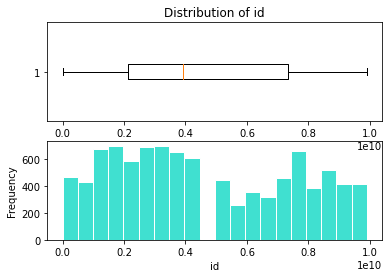

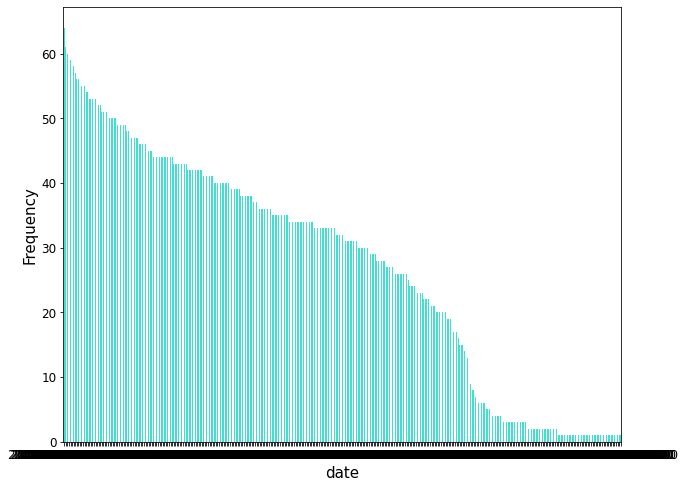

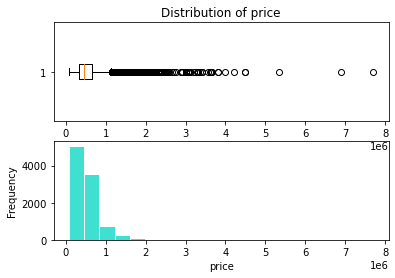

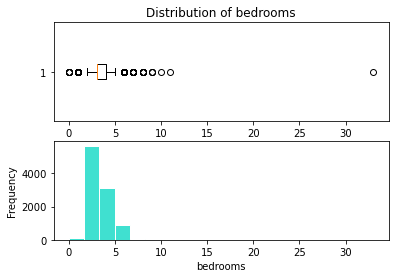

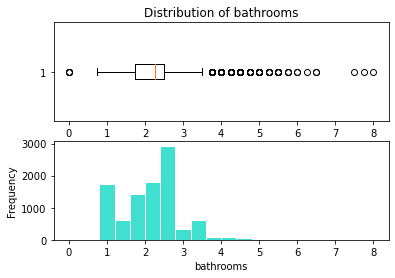

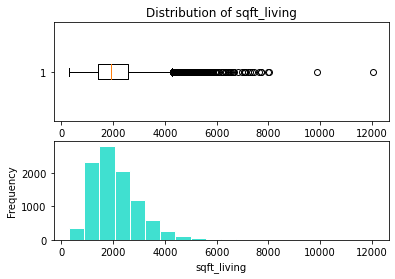

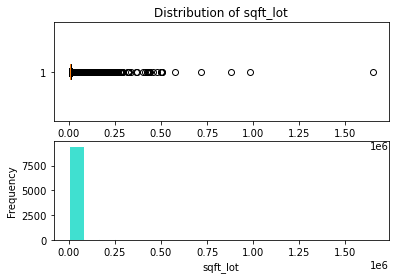

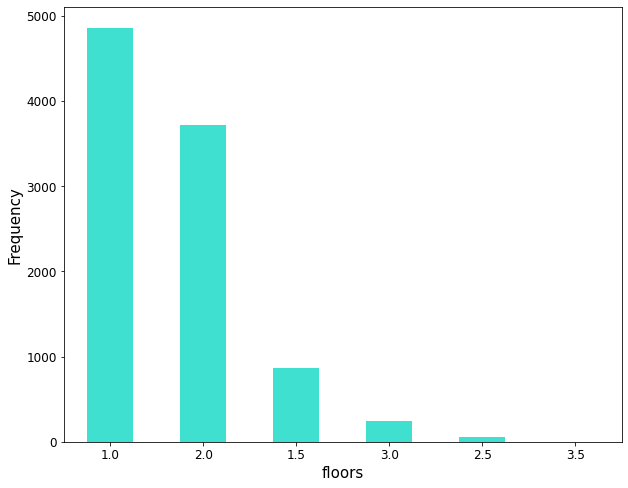

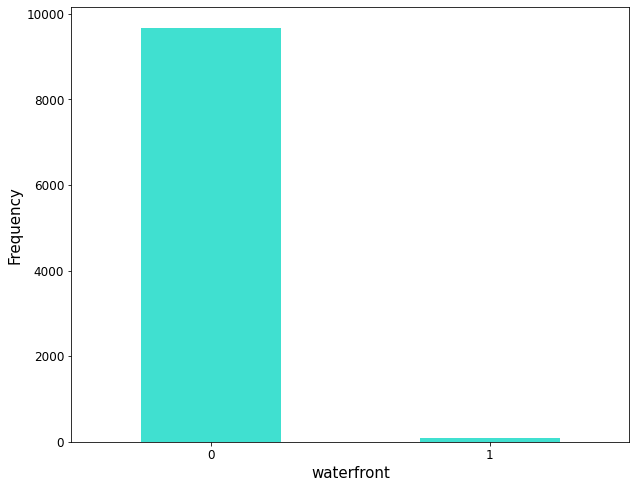

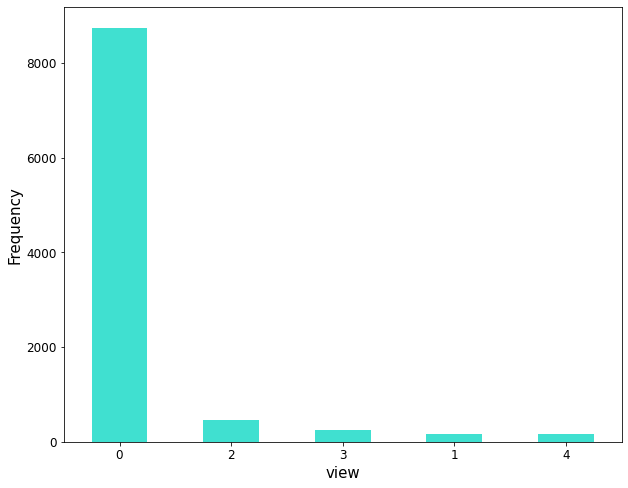

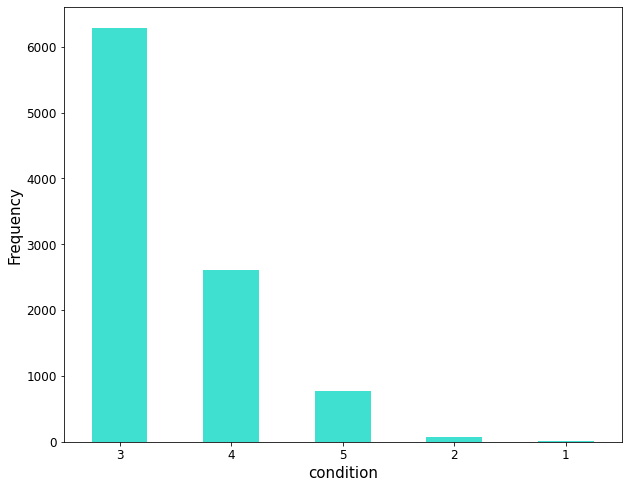

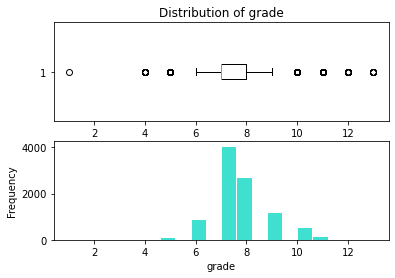

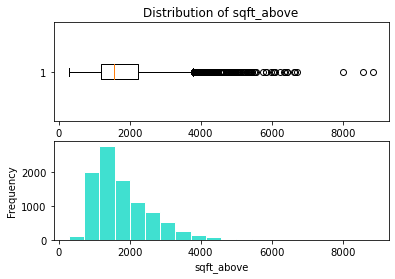

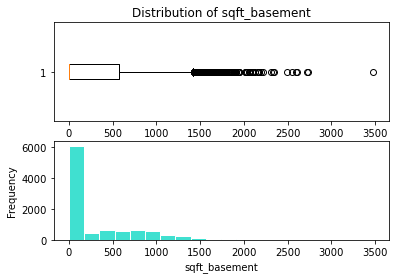

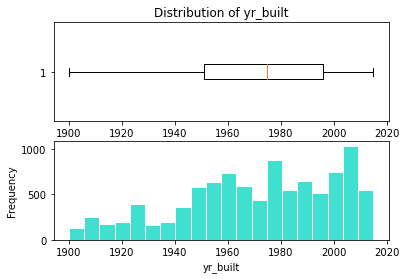

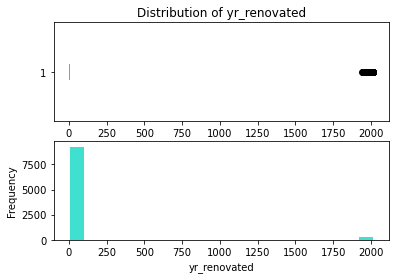

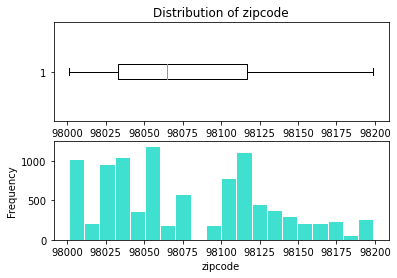

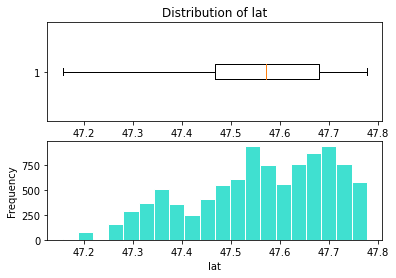

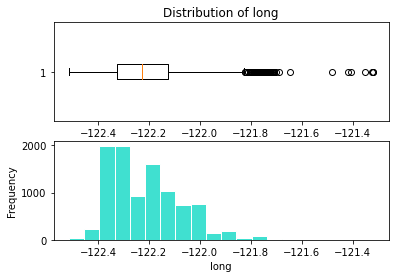

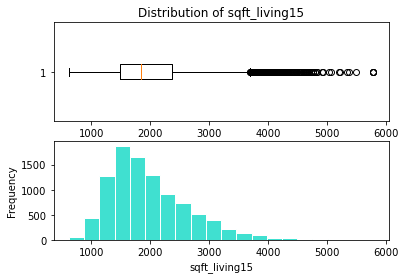

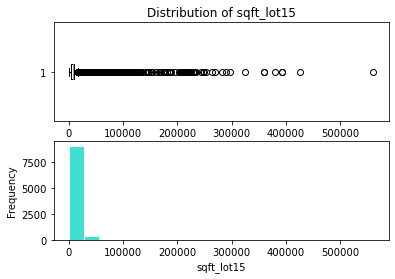

In [1870]:
import os 
#os.chdir(r"C:\Users\sreek\Documents\1. Praxis\Term 1\2. IML\Final Assignment")
graph_v2("housing.csv")

Informed Imputation Merthod to edit any weird data entries that are observed eg: 33 bedroom in 1650 

In [1871]:
hp.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


## 1. Univariate Analysis 

In [1872]:
hp["bathrooms"].value_counts()

2.50    2409
1.00    1741
1.75    1431
2.25     937
2.00     871
1.50     599
2.75     525
3.50     339
3.00     335
3.25     274
3.75      72
4.00      61
4.50      47
0.75      37
4.25      33
5.00      10
4.75       9
5.50       6
1.25       5
5.25       5
0.00       4
5.75       3
6.00       2
6.50       2
8.00       1
7.50       1
7.75       1
6.25       1
Name: bathrooms, dtype: int64

In [1873]:
hp[hp.bathrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3177,2954400190,20140624T000000,1300000.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
4472,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4507,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8840,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


1. Bathroom count zero looks weird. Checking if its an anamoly 
2. After Checking they have zero bedrooms but their grading is better and their area living is also good amount. So we are counting them as anomolies and removing from the data 

In [1874]:
hp = hp[hp.bathrooms!=0]

In [1875]:
hp = hp[hp.bedrooms!=33] #Here we have eliminated an anomoly 
#which has 33 bedrooms in less than 2000 sqft

In [1876]:
hp[hp.floors>2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
53,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,...,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
182,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
220,2625069070,20150410T000000,1390000.0,4,3.25,4860,181319,2.5,0,0,...,9,4860,0,1993,0,98074,47.6179,-122.005,3850,181319
302,6145600041,20140514T000000,306000.0,3,1.50,1220,1086,3.0,0,0,...,8,1220,0,2007,0,98133,47.7049,-122.353,1220,1422
303,3300701615,20140930T000000,655000.0,4,2.50,2630,4000,3.0,0,0,...,8,2630,0,2002,0,98117,47.6915,-122.381,1640,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,2767604724,20141015T000000,505000.0,2,2.50,1430,1201,3.0,0,0,...,8,1430,0,2009,0,98107,47.6707,-122.381,1430,1249
9744,6632300207,20150305T000000,385000.0,3,2.50,1520,1488,3.0,0,0,...,8,1520,0,2006,0,98125,47.7337,-122.309,1520,1497
9747,1931300412,20150416T000000,475000.0,3,2.25,1190,1200,3.0,0,0,...,8,1190,0,2008,0,98103,47.6542,-122.346,1180,1224
9750,1972201967,20141031T000000,520000.0,2,2.25,1530,981,3.0,0,0,...,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282


In [1877]:
hp[hp.floors>3] #Only 2 with more than 3 floors 
#Found no anomoly here 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6756,8673400177,20150402T000000,525000.0,3,3.0,1730,1074,3.5,0,0,...,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
8377,1346300150,20141020T000000,3300000.0,8,4.0,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325


In [1878]:
#Grade 
hp[hp.grade==4]
#No anomolies found here 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
213,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
499,3340401535,20141105T000000,140000.0,1,1.00,730,6890,1.0,0,0,...,4,730,0,1926,0,98055,47.4670,-122.215,1790,7969
1658,1925069006,20141203T000000,355000.0,1,0.75,530,33278,1.0,0,2,...,4,530,0,1950,0,98074,47.6412,-122.079,2830,14311
2228,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
2377,4048400185,20141022T000000,352000.0,2,0.75,760,33801,1.0,0,0,...,4,760,0,1931,0,98059,47.4703,-122.076,1100,39504
2941,7203601405,20150414T000000,217000.0,2,1.00,730,2400,1.0,0,1,...,4,730,0,1934,0,98198,47.3500,-122.322,1220,4382
3937,6730700385,20141022T000000,205000.0,3,0.75,770,7000,1.0,0,0,...,4,770,0,1942,0,98024,47.5661,-121.887,950,10500
4408,4391600065,20140814T000000,330000.0,2,0.75,520,6862,1.0,0,0,...,4,520,0,1924,1980,98010,47.3260,-122.037,1170,8756
4481,3760500240,20150512T000000,435000.0,2,0.75,750,16321,1.0,0,1,...,4,750,0,1936,0,98034,47.6985,-122.229,3020,10625
5252,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975


In [1879]:
#Living sqft above 
#No anomolies found in the rest of the data set 

### Hypothesis : 1 

1. House living area -----------------------------> More area more price 
2. Number of bedrooms more------------------------> more price  
3. Bathrooms -------------------------------------> Doesn't impact as much as the bedrooms 
4. SQFT lot more ---------------------------------> more price 
5. Age of home------------------------------------> older, cheaper 
6. Recent innovation----->atleast renovated------->not renovated (For old building) 
7. Grading ---------------------------------------> Higher, more price
8. floors ----------------------------------------> More floors more price when the sqft area is good. Also, if tower, less area ---------------> more price 
9. water front -----------------------------------> More costly 
10. view ------------------------------------------> good views -->more costly 
11. area (latitude, longitude, zipcode) -----------> good area--> good price 

In [1880]:
#Correlation 
corr = hp.corr()
corr.style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.005827,-0.000193,0.005768,-0.007380,-0.130296,0.007692,0.000826,0.023331,-0.015223,0.012646,-0.006273,-0.003616,0.026957,-0.024922,-0.012157,0.009261,0.034169,-0.000979,-0.137536
price,-0.005827,1.000000,0.316592,0.528402,0.704909,0.094104,0.262954,0.275038,0.399841,0.044396,0.665992,0.611299,0.322463,0.051722,0.120475,-0.055734,0.299052,0.024052,0.584675,0.077839
bedrooms,-0.000193,0.316592,1.000000,0.532433,0.594516,0.031254,0.194943,-0.007014,0.084874,0.027911,0.363192,0.492509,0.315465,0.167177,0.020046,-0.159165,-0.014469,0.129013,0.402078,0.020493
bathrooms,0.005768,0.528402,0.532433,1.000000,0.760804,0.079554,0.503304,0.061471,0.182907,-0.117148,0.662853,0.695200,0.281188,0.500919,0.044577,-0.202496,0.018310,0.219978,0.568283,0.069048
sqft_living,-0.007380,0.704909,0.594516,0.760804,1.000000,0.162811,0.366058,0.097271,0.285944,-0.048459,0.764836,0.878840,0.435496,0.322720,0.043662,-0.203939,0.054685,0.240799,0.757873,0.163465
sqft_lot,-0.130296,0.094104,0.031254,0.079554,0.162811,1.000000,-0.003540,0.029419,0.099219,-0.008631,0.115825,0.180975,-0.000585,0.054049,0.001215,-0.126090,-0.092284,0.224692,0.145270,0.719922
floors,0.007692,0.262954,0.194943,0.503304,0.366058,-0.003540,1.000000,0.022458,0.031980,-0.265666,0.461822,0.534763,-0.242562,0.481777,0.013682,-0.064395,0.044966,0.134549,0.289117,-0.013310
waterfront,0.000826,0.275038,-0.007014,0.061471,0.097271,0.029419,0.022458,1.000000,0.402721,0.024026,0.088221,0.064368,0.082204,-0.027003,0.101676,0.023639,-0.009410,-0.039204,0.097312,0.028506
view,0.023331,0.399841,0.084874,0.182907,0.285944,0.099219,0.031980,0.402721,1.000000,0.059932,0.258648,0.170489,0.276994,-0.056334,0.109719,0.075776,0.005508,-0.074507,0.292798,0.079927
condition,-0.015223,0.044396,0.027911,-0.117148,-0.048459,-0.008631,-0.265666,0.024026,0.059932,1.000000,-0.135558,-0.154216,0.189509,-0.357579,-0.055655,0.002807,-0.017987,-0.105342,-0.080333,0.002505


In [1881]:
# We see that price and sqft_living has very high correlation as  expected. 
#However, Waterfront though we thought it will have more impact, it doesnt look like that. 

### Bivariate Analysis

In [1882]:
hp.corr()['price'].sort_values()

zipcode         -0.055734
id              -0.005827
long             0.024052
condition        0.044396
yr_built         0.051722
sqft_lot15       0.077839
sqft_lot         0.094104
yr_renovated     0.120475
floors           0.262954
waterfront       0.275038
lat              0.299052
bedrooms         0.316592
sqft_basement    0.322463
view             0.399841
bathrooms        0.528402
sqft_living15    0.584675
sqft_above       0.611299
grade            0.665992
sqft_living      0.704909
price            1.000000
Name: price, dtype: float64

Counter intutive findings: 
## We assumed these will have more correlation with price but they don't seem to have 
-------------------------------------------------------------
1. Condition of the house 
2. yr_built  
3. (sqft_lot15,sqft_lot)= Lot area 
4. year renovated 
-------------------------------------------------------------
We thought they will have impact. 
## There is a moderate correlation observed: 
-------------------------------------------------------------
1. floors           
2. waterfront       
3. bedrooms         
4. sqft_basement    
5. view 
--------------------------------------------------------------
##  High correlation is observed here : 
--------------------------------------------------------------
1. bathrooms        
2. (sqft_living15,sqft_living) = Sqft living   
3. sqft_above       
4. grade            
--------------------------------------------------------------

#Interesting Observations: 
1. Number of Bedrooms seem to have less impact on price than better bathrooms 
2. Than the number of floors, Area(sqft_above)above seems to impact the price of the building more. 
3. Year built doesn't have much  impact on the price of the building, which is surprising. We think we need to look at the age of the building. Same with year renovated.  

In [1883]:
# We are continuing with Bivariate Analysis 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

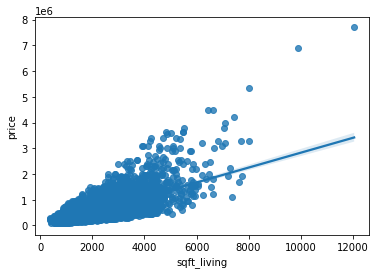

In [1884]:
#We saw that it has a high correlation(linear) with price (0.5,0.7)
sns.regplot(x='sqft_living', y='price', data=hp)
#The scatter plot is proving that
# With increase in living area the price of the house seems to increase 

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

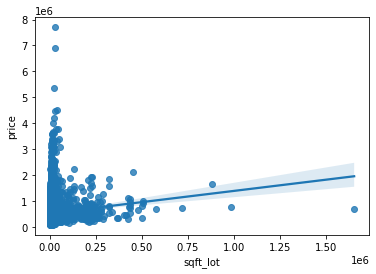

In [1885]:
#We did not see much correlation between lot area and price of the house 
# Here in the scatter plot also, the price seems to be high for the houses with less lot area also. 
# This means the value of the house is more dependent on the factors with high correlation (as observed above)
# Have to perform multivariat analysis and check this 
sns.regplot(x='sqft_lot', y='price', data=hp)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

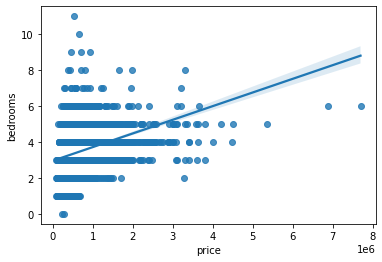

In [1886]:
sns.regplot(x='price', y='bedrooms', data=hp)
#For the same number of bedrooms we see the price varies drastically 
# However,there is a trend that, with increase in the number of bedrooms, price is increasing 

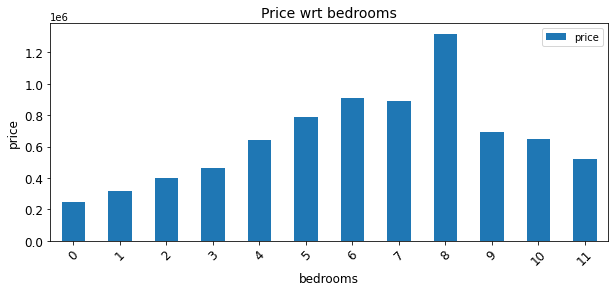

In [1887]:
hp[['bedrooms','price']].groupby(['bedrooms']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('bedrooms',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt bedrooms',fontsize=14)
plt.show()
#We see that 6 bedrooms house is priced slightly more than 7 bedroom house - Just an insight 

In [1888]:
#8 bedroom house highest price, infact very high than the 9,10,11 bedroom houses. 
#This means that there must be some preferred number of bedrooms in luxurious homes among buyers. 

<AxesSubplot:xlabel='price', ylabel='floors'>

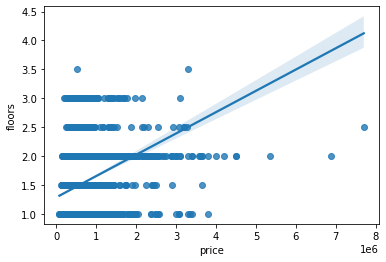

In [1889]:
sns.regplot(x='price', y='floors', data=hp)
#Number of floors follow a similar trend like bedrooms 

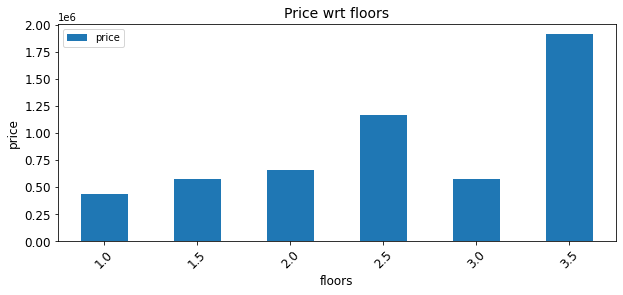

In [1890]:
hp[['floors','price']].groupby(['floors']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('floors',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt floors',fontsize=14)
plt.show()
#Highest for more floors 
#In correlation we saw that it is not very strong, around 0.3, may be because of the
#sudden rise and dip at 2.5,3. 
#Here, at 3 price is not low but is similar to 2 floors because of other factors. Maybe. 
#We have to see that 

<AxesSubplot:xlabel='price', ylabel='condition'>

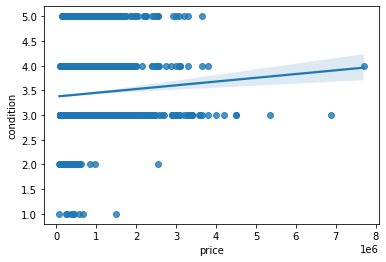

In [1891]:
sns.regplot(x='price', y='condition', data=hp)
#The trend seems to be good condition good price. 

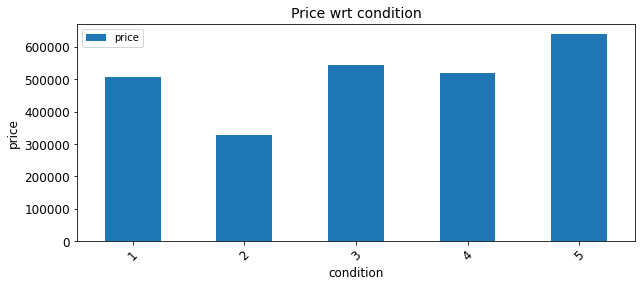

In [1892]:
hp[['condition','price']].groupby(['condition']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('condition',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt condition',fontsize=14)
plt.show()
#condition-0.044372
#So what is saw in correlation is disproved here. Condition has a good impact on price of the house 

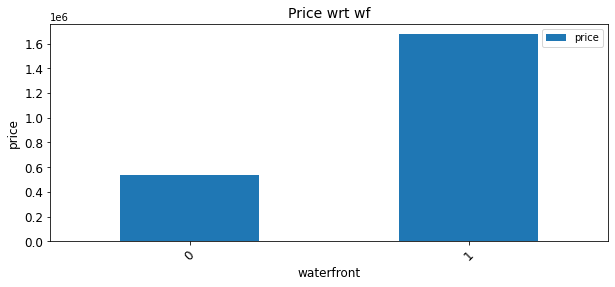

In [1893]:
hp[['waterfront','price']].groupby(['waterfront']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('waterfront',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt wf',fontsize=14)
plt.show()
#It is clear that price is more for houses with waterfront 

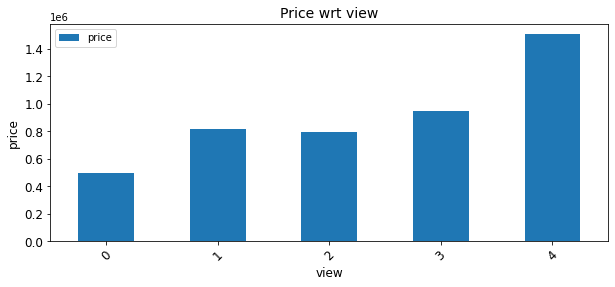

In [1894]:
hp[['view','price']].groupby(['view']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('view',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt view',fontsize=14)
plt.show()
#Good view good price 

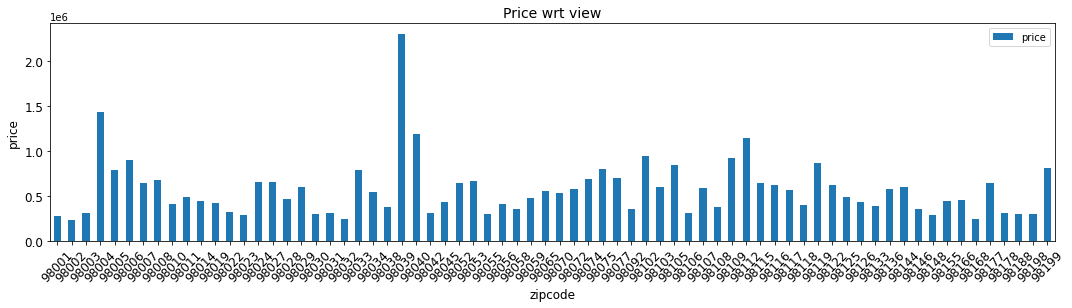

In [1895]:
hp[['zipcode','price']].groupby(['zipcode']).mean().plot(kind='bar', figsize=(18,4), fontsize=12,rot=45)
plt.xlabel('zipcode',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt view',fontsize=14)
plt.show()
# 2-3 zipcodes have very high prices 

## Hypothesis 2

From above analysis, 
1. Living area including sqft area above, grade,bathrooms and location will 
heavily impact price of the house. 
2. Age of the house should be highly important in predicting its price.
However,we need to change the feature 'Year built' to 'Age of the house' and study further.    
3. Over and above this, if other features like number of bedrooms, lot area,
view, waterfront etc., will raise the the price of the house.

## Experiment - 1 

### Model 1 

We are considering only 

1. Bedrooms 
2. Bathrooms 
3. areas 
4. waterfront
5. view 
6. grade

for our decision tree model as we have observed in the above analysis that 
other factors have a lesser impact on price prediction
Haven't considered location features here because their 
interpretability is very less. We will convert these features in 
model improvement going forward. 

## Decision tree

In [1896]:
Y = hp["price"]
X = hp[["bedrooms","bathrooms","sqft_living","waterfront","view","grade",
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=10) #Just giving an arbitrary depth
#So that DT will lot go very deep 
reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
print('MAPE=',round(np.mean(np.abs(y_pred-y_valid)/y_valid)*100,2))
#Calculating MAPE here 

MAPE= 29.44


## KNN

In [1897]:
x_train=X_train.apply(lambda X_train: ((X_train-np.mean(X_train))/np.std(X_train)))
x_valid=X_valid.apply(lambda X_valid: ((X_valid-np.mean(X_valid))/np.std(X_valid)))
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3, metric= 'euclidean')
knn.fit(x_train, y_train)
predicted_values = knn.predict(x_valid)
print('MAPE =',round(np.mean(np.abs(-predicted_values+y_valid)/y_valid)*100,3))

MAPE = 31.204


## Experiment -2 

### DT - Model - 2 

In [1898]:
Y = hp["price"]
X = hp[["bedrooms","bathrooms","sqft_living","sqft_lot",
        "floors","waterfront","view","condition","grade",
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

from sklearn.model_selection import train_test_split
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X, Y, test_size =0.25, random_state=100)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X_train_2,y_train_2)
#predicting values for y_valid

y_pred_2 = reg.predict(X_valid_2)
# Calculating MAPE
print('MAPE =',round(np.mean(np.abs(y_pred_2-y_valid_2)/y_valid_2)*100,3))

MAPE = 29.018


## KNN-Model-2

In [1899]:
from sklearn.neighbors import KNeighborsRegressor
x_train2=X_train_2.apply(lambda X_train_2: ((X_train_2-np.mean(X_train_2))/np.std(X_train_2)))
x_valid2=X_valid_2.apply(lambda X_valid_2: ((X_valid_2-np.mean(X_valid_2))/np.std(X_valid_2)))
knn=KNeighborsRegressor(n_neighbors=3, metric= 'euclidean')
knn.fit(x_train2, y_train_2)
predicted_values2 = knn.predict(x_valid2)
print('MAPE = ',round(np.mean(np.abs(-predicted_values2+y_valid_2)/y_valid_2)*100,2))

MAPE =  28.55


#### 10 fold Cross Validation 

1. The MAE and RMSE are really high.
2. Percentage error MAPE is also not impressive 
3. Because of cross validation, the error has gone even high because 
4. we are considering mean errors of 
all the validation datasets done in 10 fold. 
5. High error shows our model is not very accurate 
6. Improvements are needed 

## Experiment - 3 

## 4. Feature Engineering 

#### 1. Log Transformation of y

In [1900]:
import numpy as np
hp['log_price']=np.log(hp['price'])

In [1901]:
hp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,14.022525
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,13.056224
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,12.644328
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,12.899220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,12.969212
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,13.322337
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,13.825461
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459


#### 2. Feature Transformation 

Zipcode is a categorical variable. 

We are giving a rank to zipcode as per the price in that area,
so as to make it more interpretable.

In [1902]:
a=hp[['price','zipcode']].groupby(['zipcode']).mean()
a=a.sort_values(by='price')
a=a.rank()

In [1903]:
hp=pd.merge(hp,a,on='zipcode')

In [1904]:
hp=hp.rename(columns={'price_x':'price'})
hp=hp.rename(columns={'price_y':'zip_rank by price'})

In [1905]:
#hp['area_above'] = hp.apply(lambda row: (row['floors']*row['sqft_above']),axis=1)

In [1906]:
#Now that we got a ranking for location we are dropping location data 
hp_2 =hp.drop(['lat','long','zipcode'],axis=1)

#### 3. Feature Transformation of of year built

In [1907]:
a=np.array(2015)
for i in hp_2.date[1:]:
    a=np.append(a,int(i[:4]))
a=pd.DataFrame(a)
a

,0
0,2015
1,2014
2,2015
3,2015
4,2015
...,...
9751,2014
9752,2014
9753,2014
9754,2014


In [1908]:
b=a[0]-hp_2['yr_built']
b

0        50
1        64
2        74
3        99
4       101
       ... 
9751     13
9752     35
9753      9
9754     27
9755      1
Length: 9756, dtype: int64

In [1909]:
hp_2['age of house']=b

In [1910]:
hp_2=hp_2.drop(['yr_built'],axis=1)

In [1911]:
hp_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,log_price,zip_rank by price,age of house
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,13.311329,41.0,50
1,9169600135,20141027T000000,525000.0,3,1.50,1350,6000,1.0,0,2,3,7,900,450,0,1730,6012,13.171154,41.0,64
2,9238901420,20150202T000000,442000.0,3,1.00,1190,5100,1.0,0,0,4,7,1030,160,0,1690,5100,12.999065,41.0,74
3,2490200320,20150320T000000,545000.0,3,1.75,1680,6200,1.5,0,0,3,7,1680,0,0,1680,5100,13.208541,41.0,99
4,2349300060,20150212T000000,200000.0,4,2.00,1920,4822,1.0,0,0,2,6,920,1000,0,1120,4822,12.206073,41.0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,6500,14986,2.0,0,0,3,11,5180,1320,0,2270,8119,14.715672,70.0,13
9752,5427100150,20140626T000000,1410000.0,4,2.25,3250,16684,2.0,0,0,3,9,3250,0,0,2890,16927,14.159100,70.0,35
9753,3625049042,20141011T000000,3640000.0,5,6.00,5490,19897,2.0,0,0,3,12,5490,0,0,2910,17600,15.107494,70.0,9
9754,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,4,10,4065,0,0,3070,18713,14.483340,70.0,27


#### 4. Making information more relevant 

Sqft areas lot and living will be relevant just before they are sold.

There is no point in considering 2014 area for a house sold in 2015

when there is a change in 2015 

So creating a column that has only relevant areas 

In [1912]:
y=hp_2.price

In [1913]:
x=hp_2.drop(['price'],axis=1)
x

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,log_price,zip_rank by price,age of house
0,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,13.311329,41.0,50
1,9169600135,20141027T000000,3,1.50,1350,6000,1.0,0,2,3,7,900,450,0,1730,6012,13.171154,41.0,64
2,9238901420,20150202T000000,3,1.00,1190,5100,1.0,0,0,4,7,1030,160,0,1690,5100,12.999065,41.0,74
3,2490200320,20150320T000000,3,1.75,1680,6200,1.5,0,0,3,7,1680,0,0,1680,5100,13.208541,41.0,99
4,2349300060,20150212T000000,4,2.00,1920,4822,1.0,0,0,2,6,920,1000,0,1120,4822,12.206073,41.0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,4,5.25,6500,14986,2.0,0,0,3,11,5180,1320,0,2270,8119,14.715672,70.0,13
9752,5427100150,20140626T000000,4,2.25,3250,16684,2.0,0,0,3,9,3250,0,0,2890,16927,14.159100,70.0,35
9753,3625049042,20141011T000000,5,6.00,5490,19897,2.0,0,0,3,12,5490,0,0,2910,17600,15.107494,70.0,9
9754,2525049113,20140725T000000,4,3.50,4065,18713,2.0,0,0,4,10,4065,0,0,3070,18713,14.483340,70.0,27


In [1914]:
c=[]
d=[]
j=0
for i in x.date:
    if i.startswith('2014'):
        c.append(x['sqft_living'][j])
        d.append(x['sqft_lot'][j])
    if i.startswith('2015'):
        c.append(x['sqft_living15'][j])
        d.append(x['sqft_lot15'][j])
    j+=1

In [1915]:
c=pd.DataFrame(c)
d=pd.DataFrame(d)
hp_2['sqliv_relevant']=c
hp_2['sqlot_relevant']=d

In [1916]:
hp_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,log_price,zip_rank by price,age of house,sqliv_relevant,sqlot_relevant
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,0,1360,5000,13.311329,41.0,50,1960,5000
1,9169600135,20141027T000000,525000.0,3,1.50,1350,6000,1.0,0,2,...,900,450,0,1730,6012,13.171154,41.0,64,1350,6000
2,9238901420,20150202T000000,442000.0,3,1.00,1190,5100,1.0,0,0,...,1030,160,0,1690,5100,12.999065,41.0,74,1690,5100
3,2490200320,20150320T000000,545000.0,3,1.75,1680,6200,1.5,0,0,...,1680,0,0,1680,5100,13.208541,41.0,99,1680,5100
4,2349300060,20150212T000000,200000.0,4,2.00,1920,4822,1.0,0,0,...,920,1000,0,1120,4822,12.206073,41.0,101,1120,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,6500,14986,2.0,0,0,...,5180,1320,0,2270,8119,14.715672,70.0,13,6500,14986
9752,5427100150,20140626T000000,1410000.0,4,2.25,3250,16684,2.0,0,0,...,3250,0,0,2890,16927,14.159100,70.0,35,3250,16684
9753,3625049042,20141011T000000,3640000.0,5,6.00,5490,19897,2.0,0,0,...,5490,0,0,2910,17600,15.107494,70.0,9,5490,19897
9754,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,4065,0,0,3070,18713,14.483340,70.0,27,4065,18713


In [1917]:
# now that we got relevant areas, we are dropping the area columns 

In [1918]:
hp_3=hp_2.drop(['sqft_living','sqft_living15','sqft_lot','sqft_lot15'],axis=1)

In [1919]:
hp_3

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,log_price,zip_rank by price,age of house,sqliv_relevant,sqlot_relevant
0,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,1050,910,0,13.311329,41.0,50,1960,5000
1,9169600135,20141027T000000,525000.0,3,1.50,1.0,0,2,3,7,900,450,0,13.171154,41.0,64,1350,6000
2,9238901420,20150202T000000,442000.0,3,1.00,1.0,0,0,4,7,1030,160,0,12.999065,41.0,74,1690,5100
3,2490200320,20150320T000000,545000.0,3,1.75,1.5,0,0,3,7,1680,0,0,13.208541,41.0,99,1680,5100
4,2349300060,20150212T000000,200000.0,4,2.00,1.0,0,0,2,6,920,1000,0,12.206073,41.0,101,1120,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,2.0,0,0,3,11,5180,1320,0,14.715672,70.0,13,6500,14986
9752,5427100150,20140626T000000,1410000.0,4,2.25,2.0,0,0,3,9,3250,0,0,14.159100,70.0,35,3250,16684
9753,3625049042,20141011T000000,3640000.0,5,6.00,2.0,0,0,3,12,5490,0,0,15.107494,70.0,9,5490,19897
9754,2525049113,20140725T000000,1950000.0,4,3.50,2.0,0,0,4,10,4065,0,0,14.483340,70.0,27,4065,18713


#### 5. Feature Transformation for year renovated 

In [1920]:
hp_3.yr_renovated.iloc[1403] = 0 
hp_3.yr_renovated.iloc[7538] = 0 
hp_3.yr_renovated.iloc[8826] = 0
hp_3
# We saw that only 4 houses are there which are renovated after being sold 
# So taking them as not renovated 

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,log_price,zip_rank by price,age of house,sqliv_relevant,sqlot_relevant
0,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,1050,910,0,13.311329,41.0,50,1960,5000
1,9169600135,20141027T000000,525000.0,3,1.50,1.0,0,2,3,7,900,450,0,13.171154,41.0,64,1350,6000
2,9238901420,20150202T000000,442000.0,3,1.00,1.0,0,0,4,7,1030,160,0,12.999065,41.0,74,1690,5100
3,2490200320,20150320T000000,545000.0,3,1.75,1.5,0,0,3,7,1680,0,0,13.208541,41.0,99,1680,5100
4,2349300060,20150212T000000,200000.0,4,2.00,1.0,0,0,2,6,920,1000,0,12.206073,41.0,101,1120,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,2.0,0,0,3,11,5180,1320,0,14.715672,70.0,13,6500,14986
9752,5427100150,20140626T000000,1410000.0,4,2.25,2.0,0,0,3,9,3250,0,0,14.159100,70.0,35,3250,16684
9753,3625049042,20141011T000000,3640000.0,5,6.00,2.0,0,0,3,12,5490,0,0,15.107494,70.0,9,5490,19897
9754,2525049113,20140725T000000,1950000.0,4,3.50,2.0,0,0,4,10,4065,0,0,14.483340,70.0,27,4065,18713


In [1921]:
for i in  range(len(hp)):
    if hp_3.yr_renovated.iloc[i]>0:
        hp_3.yr_renovated.iloc[i]=1

In [1922]:
hp_3[hp_3.yr_renovated>0]

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,log_price,zip_rank by price,age of house,sqliv_relevant,sqlot_relevant
19,9238900855,20150313T000000,700000.0,2,1.00,1.0,0,3,3,7,930,0,1,13.458836,41.0,89,1760,5228
25,2815600215,20141118T000000,462500.0,2,2.00,2.0,0,0,3,7,1540,0,1,13.044402,41.0,66,1540,7290
28,2490200165,20140623T000000,500000.0,3,1.00,2.0,0,0,3,8,1150,0,1,13.122363,41.0,103,1150,5100
31,2484200080,20140729T000000,731100.0,3,2.50,1.0,0,0,3,8,1160,900,1,13.502306,41.0,61,2060,8778
50,7934000145,20141201T000000,450000.0,4,2.75,2.0,0,0,3,7,2040,860,1,13.017003,41.0,103,2900,6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,3528900086,20140508T000000,1310000.0,5,3.25,1.5,0,0,5,10,1910,890,1,14.085538,65.0,82,2800,3200
9728,2652501513,20140813T000000,539950.0,3,2.00,1.5,0,0,3,7,1560,0,1,13.199232,65.0,104,1560,3200
9743,5425700205,20140520T000000,1800000.0,4,3.50,1.0,0,0,3,9,2550,1910,1,14.403297,70.0,52,4460,16953
9745,2425049107,20150305T000000,1950000.0,4,3.75,1.0,0,0,3,9,3130,1020,1,14.483340,70.0,52,3930,21420


In [1923]:
hp_3 = hp_3.sample(frac=1)

In [1924]:
hp_3

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,log_price,zip_rank by price,age of house,sqliv_relevant,sqlot_relevant
1975,2652500070,20140508T000000,636000.0,2,1.75,1.5,0,0,5,7,1230,0,0,13.362954,63.0,89,1230,3600
790,2872900280,20150406T000000,540000.0,4,2.25,1.0,0,0,4,8,1430,1610,0,13.199324,56.0,31,1870,11074
357,8825900070,20140818T000000,705000.0,6,2.00,1.5,0,0,4,7,1970,600,0,13.465953,48.0,103,2570,4240
6871,5569620050,20140721T000000,731688.0,4,3.00,2.0,0,0,3,9,2630,0,0,13.503109,50.0,8,2630,5772
410,5100403947,20140804T000000,580000.0,4,2.50,2.0,0,0,3,8,2150,0,0,13.270783,48.0,13,2150,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,1226039130,20141009T000000,355000.0,3,2.25,1.0,0,0,3,8,1300,680,0,12.779873,51.0,50,1980,7200
2887,6021501535,20141223T000000,700000.0,3,1.50,1.0,0,0,3,8,1290,290,0,13.458836,39.0,75,1580,5000
6419,291310180,20140613T000000,379500.0,3,2.25,2.0,0,0,3,7,1290,120,0,12.846610,52.0,9,1410,1287
4984,6031400094,20150226T000000,347500.0,5,3.00,1.0,0,0,3,7,1330,900,0,12.758520,2.0,1,2230,9476


In [1925]:
Y=hp_3.log_price
Y

1975    13.362954
790     13.199324
357     13.465953
6871    13.503109
410     13.270783
          ...    
7508    12.779873
2887    13.458836
6419    12.846610
4984    12.758520
6853    13.239435
Name: log_price, Length: 9756, dtype: float64

In [1926]:
X=hp_3.drop(['price','date',"log_price","id"],axis=1)

In [1927]:
X 

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zip_rank by price,age of house,sqliv_relevant,sqlot_relevant
1975,2,1.75,1.5,0,0,5,7,1230,0,0,63.0,89,1230,3600
790,4,2.25,1.0,0,0,4,8,1430,1610,0,56.0,31,1870,11074
357,6,2.00,1.5,0,0,4,7,1970,600,0,48.0,103,2570,4240
6871,4,3.00,2.0,0,0,3,9,2630,0,0,50.0,8,2630,5772
410,4,2.50,2.0,0,0,3,8,2150,0,0,48.0,13,2150,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7508,3,2.25,1.0,0,0,3,8,1300,680,0,51.0,50,1980,7200
2887,3,1.50,1.0,0,0,3,8,1290,290,0,39.0,75,1580,5000
6419,3,2.25,2.0,0,0,3,7,1290,120,0,52.0,9,1410,1287
4984,5,3.00,1.0,0,0,3,7,1330,900,0,2.0,1,2230,9476


## DT - Model 4 

In [1928]:
from sklearn.tree import DecisionTreeRegressor

## fit model k = 10
k=10
i=0
j=int(len(X)/k)
RMSE = []
MAE = []
MAPE = []

for q in range(1,k+1):
    #subsetting x_train into k partitions
    x_valid = X[i:j]
    y_valid = Y[i:j]
    
    x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
    y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)
    
    
    regdt = DecisionTreeRegressor(max_depth=10)
    regdt.fit(x_tr,y_tr)
    y_pred_dt = regdt.predict(x_valid)
    y_pred_dt=np.exp(y_pred_dt)
    y_valid=np.exp(y_valid)
    RMSE.append((np.mean((y_valid - y_pred_dt)**2)**0.5))
    MAE.append(np.mean(np.abs(y_valid-y_pred_dt)))
    MAPE.append(np.mean(np.abs((y_valid-y_pred_dt)*100/y_valid)))
    i = j
    j = i + int(len(X)/k)

print("RMSE: ",np.mean(RMSE))
print("MAE: ",np.mean(MAE))
print("MAPE: ",np.mean(MAPE))

RMSE:  195682.4260139404
MAE:  100261.39028623923
MAPE:  17.43162355511088


## KNN Model 4

In [1929]:
X=X.apply(lambda X: ((X-np.mean(X))/np.std(X)))
## fit model k = 10
k=10
i=0
j=int(len(X)/k)
RMSE = []
MAE = []
MAPE = []

for q in range(1,k+1):
    #subsetting x_train into k partitions
    x_valid = X[i:j]
    y_valid = Y[i:j]
    
    x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
    y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)
    
    
    regknn = KNeighborsRegressor()
    regknn.fit(x_tr,y_tr)
    y_pred_knn = regknn.predict(x_valid)
    y_pred_knn=np.exp(y_pred_knn)
    y_valid=np.exp(y_valid)
    RMSE.append((np.mean((y_valid - y_pred_knn)**2)**0.5))
    MAE.append(np.mean(np.abs(y_valid-y_pred_knn)))
    MAPE.append(np.mean(np.abs((y_valid-y_pred_knn)*100/y_valid)))
    i = j
    j = i + int(len(X)/k)

print("RMSE: ",np.mean(RMSE))
print("MAE: ",np.mean(MAE))
print("MAPE: ",np.mean(MAPE))

RMSE:  186675.26187290062
MAE:  96301.60825422357
MAPE:  16.828206222486312


## Experiment-4

In [1930]:
hp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,zip_rank by price
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,41.0
1,9169600135,20141027T000000,525000.0,3,1.50,1350,6000,1.0,0,2,...,450,1950,0,98136,47.5275,-122.391,1730,6012,13.171154,41.0
2,9238901420,20150202T000000,442000.0,3,1.00,1190,5100,1.0,0,0,...,160,1941,0,98136,47.5346,-122.385,1690,5100,12.999065,41.0
3,2490200320,20150320T000000,545000.0,3,1.75,1680,6200,1.5,0,0,...,0,1916,0,98136,47.5338,-122.384,1680,5100,13.208541,41.0
4,2349300060,20150212T000000,200000.0,4,2.00,1920,4822,1.0,0,0,...,1000,1914,0,98136,47.5507,-122.381,1120,4822,12.206073,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,6500,14986,2.0,0,0,...,1320,2001,0,98039,47.6304,-122.236,2270,8119,14.715672,70.0
9752,5427100150,20140626T000000,1410000.0,4,2.25,3250,16684,2.0,0,0,...,0,1979,0,98039,47.6334,-122.229,2890,16927,14.159100,70.0
9753,3625049042,20141011T000000,3640000.0,5,6.00,5490,19897,2.0,0,0,...,0,2005,0,98039,47.6165,-122.236,2910,17600,15.107494,70.0
9754,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,0,1987,0,98039,47.6209,-122.237,3070,18713,14.483340,70.0


In [1931]:
hp_5 = hp.drop("date",axis =1)

In [1932]:
hp_5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,zip_rank by price
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,41.0
1,9169600135,525000.0,3,1.50,1350,6000,1.0,0,2,3,...,450,1950,0,98136,47.5275,-122.391,1730,6012,13.171154,41.0
2,9238901420,442000.0,3,1.00,1190,5100,1.0,0,0,4,...,160,1941,0,98136,47.5346,-122.385,1690,5100,12.999065,41.0
3,2490200320,545000.0,3,1.75,1680,6200,1.5,0,0,3,...,0,1916,0,98136,47.5338,-122.384,1680,5100,13.208541,41.0
4,2349300060,200000.0,4,2.00,1920,4822,1.0,0,0,2,...,1000,1914,0,98136,47.5507,-122.381,1120,4822,12.206073,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,2460000.0,4,5.25,6500,14986,2.0,0,0,3,...,1320,2001,0,98039,47.6304,-122.236,2270,8119,14.715672,70.0
9752,5427100150,1410000.0,4,2.25,3250,16684,2.0,0,0,3,...,0,1979,0,98039,47.6334,-122.229,2890,16927,14.159100,70.0
9753,3625049042,3640000.0,5,6.00,5490,19897,2.0,0,0,3,...,0,2005,0,98039,47.6165,-122.236,2910,17600,15.107494,70.0
9754,2525049113,1950000.0,4,3.50,4065,18713,2.0,0,0,4,...,0,1987,0,98039,47.6209,-122.237,3070,18713,14.483340,70.0


In [1933]:
 pd.get_dummies(hp_5,'zipcode')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,zip_rank by price
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,41.0
1,9169600135,525000.0,3,1.50,1350,6000,1.0,0,2,3,...,450,1950,0,98136,47.5275,-122.391,1730,6012,13.171154,41.0
2,9238901420,442000.0,3,1.00,1190,5100,1.0,0,0,4,...,160,1941,0,98136,47.5346,-122.385,1690,5100,12.999065,41.0
3,2490200320,545000.0,3,1.75,1680,6200,1.5,0,0,3,...,0,1916,0,98136,47.5338,-122.384,1680,5100,13.208541,41.0
4,2349300060,200000.0,4,2.00,1920,4822,1.0,0,0,2,...,1000,1914,0,98136,47.5507,-122.381,1120,4822,12.206073,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,2460000.0,4,5.25,6500,14986,2.0,0,0,3,...,1320,2001,0,98039,47.6304,-122.236,2270,8119,14.715672,70.0
9752,5427100150,1410000.0,4,2.25,3250,16684,2.0,0,0,3,...,0,1979,0,98039,47.6334,-122.229,2890,16927,14.159100,70.0
9753,3625049042,3640000.0,5,6.00,5490,19897,2.0,0,0,3,...,0,2005,0,98039,47.6165,-122.236,2910,17600,15.107494,70.0
9754,2525049113,1950000.0,4,3.50,4065,18713,2.0,0,0,4,...,0,1987,0,98039,47.6209,-122.237,3070,18713,14.483340,70.0


In [1934]:
hpdum = pd.get_dummies(hp.zipcode,drop_first = True)

In [1935]:
X=hp.drop(['price','date',"lat","long","id"],axis=1)

In [1936]:
Xdum = pd.concat([X,hpdum],axis = 1)

In [1937]:
Xdum

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
1,3,1.50,1350,6000,1.0,0,2,3,7,900,...,0,0,0,0,0,0,0,0,0,0
2,3,1.00,1190,5100,1.0,0,0,4,7,1030,...,0,0,0,0,0,0,0,0,0,0
3,3,1.75,1680,6200,1.5,0,0,3,7,1680,...,0,0,0,0,0,0,0,0,0,0
4,4,2.00,1920,4822,1.0,0,0,2,6,920,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,4,5.25,6500,14986,2.0,0,0,3,11,5180,...,0,0,0,0,0,0,0,0,0,0
9752,4,2.25,3250,16684,2.0,0,0,3,9,3250,...,0,0,0,0,0,0,0,0,0,0
9753,5,6.00,5490,19897,2.0,0,0,3,12,5490,...,0,0,0,0,0,0,0,0,0,0
9754,4,3.50,4065,18713,2.0,0,0,4,10,4065,...,0,0,0,0,0,0,0,0,0,0


In [1938]:
Xdum.columns

Index([         'bedrooms',         'bathrooms',       'sqft_living',
                'sqft_lot',            'floors',        'waterfront',
                    'view',         'condition',             'grade',
              'sqft_above',     'sqft_basement',          'yr_built',
            'yr_renovated',           'zipcode',     'sqft_living15',
              'sqft_lot15',         'log_price', 'zip_rank by price',
                     98002,               98003,               98004,
                     98005,               98006,               98007,
                     98008,               98010,               98011,
                     98014,               98019,               98022,
                     98023,               98024,               98027,
                     98028,               98029,               98030,
                     98031,               98032,               98033,
                     98034,               98038,               98039,
                    

In [1939]:
Y=hp.price
Y

0        604000.0
1        525000.0
2        442000.0
3        545000.0
4        200000.0
          ...    
9751    2460000.0
9752    1410000.0
9753    3640000.0
9754    1950000.0
9755    2900000.0
Name: price, Length: 9756, dtype: float64

In [1940]:
from sklearn.tree import DecisionTreeRegressor
X = Xdum
## fit model k = 10
k=10
i=0
j=int(len(X)/k)
RMSE = []
MAE = []
MAPE = []

for q in range(1,k+1):
    #subsetting x_train into k partitions
    x_valid = X[i:j]
    y_valid = Y[i:j]
    
    x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
    y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)
    
    #fit K-NN (10-NN) model
    reg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=13)
    reg.fit(x_tr,y_tr)
    y_pred = reg.predict(x_valid)
    #y_pred=np.exp(y_pred)
    #y_valid=np.exp(y_valid)
    RMSE.append((np.mean((y_valid - y_pred)**2)**0.5))
    MAE.append(np.mean(np.abs(y_valid-y_pred)))
    MAPE.append(np.mean(np.abs((y_valid-y_pred)*100/y_valid)))
    i = j
    j = i + int(len(X)/k)

print("RMSE: ",np.mean(RMSE))
print("MAE: ",np.mean(MAE))
print("MAPE: ",np.mean(MAPE))

RMSE:  34939.449599062864
MAE:  4105.086386499757
MAPE:  0.4545208028214967


In [1941]:
#We see that dummy variables are not helping this model. 

## Experiment - 5

In [1942]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
1,3,1.50,1350,6000,1.0,0,2,3,7,900,...,0,0,0,0,0,0,0,0,0,0
2,3,1.00,1190,5100,1.0,0,0,4,7,1030,...,0,0,0,0,0,0,0,0,0,0
3,3,1.75,1680,6200,1.5,0,0,3,7,1680,...,0,0,0,0,0,0,0,0,0,0
4,4,2.00,1920,4822,1.0,0,0,2,6,920,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,4,5.25,6500,14986,2.0,0,0,3,11,5180,...,0,0,0,0,0,0,0,0,0,0
9752,4,2.25,3250,16684,2.0,0,0,3,9,3250,...,0,0,0,0,0,0,0,0,0,0
9753,5,6.00,5490,19897,2.0,0,0,3,12,5490,...,0,0,0,0,0,0,0,0,0,0
9754,4,3.50,4065,18713,2.0,0,0,4,10,4065,...,0,0,0,0,0,0,0,0,0,0


In [1943]:
dat=pd.read_csv('test.csv') 
#Passing the test data through those transformations 
dat

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,20141215T000000,405000.0,4,2.50,1980,5020,2.0,0,0,...,7,1980,0,2007,0,98056,47.5147,-122.190,1980,5064
2213,2855000110,20140808T000000,388000.0,3,2.50,2198,6222,2.0,0,2,...,8,2198,0,2010,0,98198,47.3906,-122.304,2198,7621
2214,3345700207,20150502T000000,608500.0,4,3.50,2850,5577,2.0,0,0,...,8,1950,900,2014,0,98056,47.5252,-122.192,2850,5708
2215,6056111067,20140707T000000,230000.0,3,1.75,1140,1201,2.0,0,0,...,8,1140,0,2014,0,98108,47.5637,-122.295,1210,1552


In [1944]:
c=[]
d=[]
j=0
for i in dat.date:
    if i.startswith('2014'):
        c.append(dat['sqft_living'][j])
        d.append(dat['sqft_lot'][j])
    if i.startswith('2015'):
        c.append(dat['sqft_living15'][j])
        d.append(dat['sqft_lot15'][j])
    j+=1
c=pd.DataFrame(c)
d=pd.DataFrame(d)
dat['sqliv_relevant']=c
dat['sqlot_relevant']=d

In [1945]:
dat

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqliv_relevant,sqlot_relevant
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,0,1900,0,98107,47.6700,-122.394,1360,4850,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,0,1921,0,98002,47.3089,-122.210,1060,5095,1200,9850
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,820,1929,0,98117,47.6823,-122.368,1460,5000,2330,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,330,1969,0,98001,47.3341,-122.282,1290,7800,1290,7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,20141215T000000,405000.0,4,2.50,1980,5020,2.0,0,0,...,0,2007,0,98056,47.5147,-122.190,1980,5064,1980,5020
2213,2855000110,20140808T000000,388000.0,3,2.50,2198,6222,2.0,0,2,...,0,2010,0,98198,47.3906,-122.304,2198,7621,2198,6222
2214,3345700207,20150502T000000,608500.0,4,3.50,2850,5577,2.0,0,0,...,900,2014,0,98056,47.5252,-122.192,2850,5708,2850,5708
2215,6056111067,20140707T000000,230000.0,3,1.75,1140,1201,2.0,0,0,...,0,2014,0,98108,47.5637,-122.295,1210,1552,1140,1201


In [1946]:
a=hp[['price','zipcode']].groupby(['zipcode']).mean()
a=a.sort_values(by='price')
a=a.rank()
dat=pd.merge(dat,a,on='zipcode')
dat

,id,date,price_x,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqliv_relevant,sqlot_relevant,price_y
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,2390,7570,20.0
1,5416510830,20140806T000000,300000.0,4,2.50,1910,4862,2.0,0,0,...,2005,0,98038,47.3607,-122.034,2010,5091,1910,4862,20.0
2,1545808560,20150403T000000,245000.0,3,2.50,1530,8500,1.0,0,0,...,1996,0,98038,47.3592,-122.046,1850,8140,1850,8140,20.0
3,4123840310,20150106T000000,342500.0,3,2.50,1810,5192,2.0,0,0,...,1993,0,98038,47.3724,-122.042,1810,6200,1810,6200,20.0
4,2322069114,20141010T000000,287653.0,3,1.00,1050,16050,1.0,0,0,...,1960,1981,98038,47.3841,-122.006,1610,27600,1050,16050,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2525049246,20141017T000000,1550000.0,2,2.25,2950,15593,1.0,0,0,...,1942,1986,98039,47.6209,-122.236,2060,19855,2950,15593,70.0
2213,5427110040,20140609T000000,1230000.0,4,2.50,2740,16007,2.0,0,0,...,1984,0,98039,47.6353,-122.229,2760,16008,2740,16007,70.0
2214,3025300095,20141009T000000,2500000.0,4,4.50,4300,19844,2.0,0,0,...,1985,1999,98039,47.6218,-122.237,3070,19845,4300,19844,70.0
2215,2525049263,20140709T000000,2680000.0,5,3.00,4290,20445,2.0,0,0,...,1985,0,98039,47.6217,-122.239,3620,22325,4290,20445,70.0


In [1947]:
dat=dat.drop(['lat','long','sqft_living','sqft_lot','sqft_lot15','sqft_living15','zipcode'],axis=1)

In [1948]:
dat=dat.rename(columns={'price_x':'price'})
dat=dat.rename(columns={'price_y':'zip_rank by price'})

In [1949]:
Y=dat.price
Y

0        323000.0
1        300000.0
2        245000.0
3        342500.0
4        287653.0
          ...    
2212    1550000.0
2213    1230000.0
2214    2500000.0
2215    2680000.0
2216    2720000.0
Name: price, Length: 2217, dtype: float64

In [1950]:
X=dat.drop(['price','yr_renovated'],axis=1)
X

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqliv_relevant,sqlot_relevant,zip_rank by price
0,3793500160,20150312T000000,3,2.50,2.0,0,0,3,7,1890,0,2003,2390,7570,20.0
1,5416510830,20140806T000000,4,2.50,2.0,0,0,3,7,1910,0,2005,1910,4862,20.0
2,1545808560,20150403T000000,3,2.50,1.0,0,0,5,7,1030,500,1996,1850,8140,20.0
3,4123840310,20150106T000000,3,2.50,2.0,0,0,3,8,1810,0,1993,1810,6200,20.0
4,2322069114,20141010T000000,3,1.00,1.0,0,0,4,7,1050,0,1960,1050,16050,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2525049246,20141017T000000,2,2.25,1.0,0,0,4,8,1560,1390,1942,2950,15593,70.0
2213,5427110040,20140609T000000,4,2.50,2.0,0,0,3,9,2740,0,1984,2740,16007,70.0
2214,3025300095,20141009T000000,4,4.50,2.0,0,0,3,11,4300,0,1985,4300,19844,70.0
2215,2525049263,20140709T000000,5,3.00,2.0,0,0,4,11,4290,0,1985,4290,20445,70.0


In [1951]:
X=dat.drop(['id','date','price'],axis=1)
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqliv_relevant,sqlot_relevant,zip_rank by price
0,3,2.50,2.0,0,0,3,7,1890,0,2003,0,2390,7570,20.0
1,4,2.50,2.0,0,0,3,7,1910,0,2005,0,1910,4862,20.0
2,3,2.50,1.0,0,0,5,7,1030,500,1996,0,1850,8140,20.0
3,3,2.50,2.0,0,0,3,8,1810,0,1993,0,1810,6200,20.0
4,3,1.00,1.0,0,0,4,7,1050,0,1960,1981,1050,16050,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2,2.25,1.0,0,0,4,8,1560,1390,1942,1986,2950,15593,70.0
2213,4,2.50,2.0,0,0,3,9,2740,0,1984,0,2740,16007,70.0
2214,4,4.50,2.0,0,0,3,11,4300,0,1985,1999,4300,19844,70.0
2215,5,3.00,2.0,0,0,4,11,4290,0,1985,0,4290,20445,70.0


In [1952]:
from sklearn.tree import DecisionTreeRegressor
## fit model k = 10
k=10
i=0
j=int(len(X)/k)
RMSE = []
MAE = []
MAPE = []

for q in range(1,k+1):
    #subsetting x_train into k partitions
    x_valid = X[i:j]
    y_valid = Y[i:j]
    
    x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
    y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)
    
    #fit K-NN (10-NN) model
    reg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=13)
    reg.fit(x_tr,y_tr)
    y_pred = reg.predict(x_valid)
    #y_pred=np.exp(y_pred)
    #y_valid=np.exp(y_valid)
    RMSE.append((np.mean((y_valid - y_pred)**2)**0.5))
    MAE.append(np.mean(np.abs(y_valid-y_pred)))
    MAPE.append(np.mean(np.abs((y_valid-y_pred)*100/y_valid)))
    i = j
    j = i + int(len(X)/k)

print("RMSE: ",np.mean(RMSE))
print("MAE: ",np.mean(MAE))
print("MAPE: ",np.mean(MAPE))

RMSE:  200545.6496209142
MAE:  121184.82286235814
MAPE:  22.715093431728114


## Experiment-6

We see that only zipcode ranking is helping nothing else. 
So trying only with that feature transformation 

In [1953]:
Y = hp["price"]
X = hp[["bedrooms","bathrooms","sqft_living","waterfront","view","grade",
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=10) #Just giving an arbitrary depth
#So that DT will lot go very deep 
reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)
# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5
round(RMSE_per,0)

43.0

In [1954]:
house=pd.read_csv('housing.csv')
# Ranking Zipcode
a=house[['price','zipcode']].groupby(['zipcode']).mean()
a=a.sort_values(by='price')
a=a.rank()
hp=pd.merge(house,a,on='zipcode')
hp=hp.rename(columns={'price_x':'price'})
hp=hp.rename(columns={'price_y':'rank by zip'})
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rank by zip
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,41.0
1,9169600135,20141027T000000,525000.0,3,1.50,1350,6000,1.0,0,2,...,900,450,1950,0,98136,47.5275,-122.391,1730,6012,41.0
2,9238901420,20150202T000000,442000.0,3,1.00,1190,5100,1.0,0,0,...,1030,160,1941,0,98136,47.5346,-122.385,1690,5100,41.0
3,2490200320,20150320T000000,545000.0,3,1.75,1680,6200,1.5,0,0,...,1680,0,1916,0,98136,47.5338,-122.384,1680,5100,41.0
4,2349300060,20150212T000000,200000.0,4,2.00,1920,4822,1.0,0,0,...,920,1000,1914,0,98136,47.5507,-122.381,1120,4822,41.0


In [1955]:
X=hp.drop(['price','date','id','zipcode','long','lat','yr_renovated'],axis=1)
Y = hp["price"]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=8,min_samples_leaf=8,criterion='friedman_mse')
reg.fit(X_train,y_train)
#predicting values for y_valid

y_pred = reg.predict(X_valid)


# Calculating MAPE
MAPE = (np.sum(np.abs(y_pred-y_valid)*100/y_valid))/len(y_valid)

# Calculating RMSE
RMSE_per = ((np.sum(((y_pred-y_valid)*100/y_valid)**2))/len(y_valid))**0.5


print("MAPE: ",MAPE)
print("RMSE: ",RMSE_per)

MAPE:  17.42130112425519
RMSE:  25.55574553337362


## Hyperparameter tuning for Decision Tree

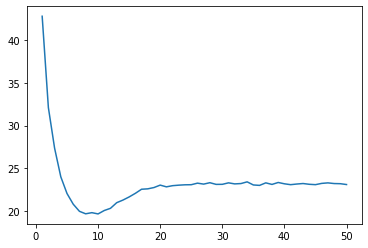

In [1956]:
err=[]
n=list(range(1,51))
for dep in range(1,51):
    from sklearn.tree import DecisionTreeRegressor

    ## fit model k = 10
    k=10
    i=0
    j=int(len(X)/k)
    MAPE = []

    for q in range(1,k+1):
        #subsetting x_train into k partitions
        x_valid = X[i:j]
        y_valid = Y[i:j]

        x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
        y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)

        
        reg = DecisionTreeRegressor(max_depth=dep)
        reg.fit(x_tr,y_tr)
        y_pred = reg.predict(x_valid)
        MAPE.append(np.mean(np.abs((y_valid-y_pred)*100/y_valid)))
        i = j
        j = i + int(len(X)/k)
    err.append(np.mean(MAPE))
plt.plot(n,np.array(err))  

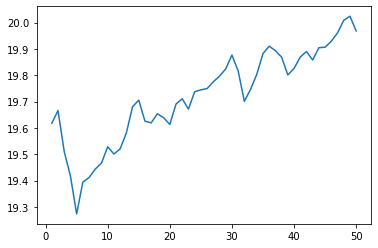

In [1957]:
err=[]
n=list(range(1,51))
for dep in range(1,51):
    from sklearn.tree import DecisionTreeRegressor

    ## fit model k = 10
    k=10
    i=0
    j=int(len(X)/k)
    MAPE = []

    for q in range(1,k+1):
        #subsetting x_train into k partitions
        x_valid = X[i:j]
        y_valid = Y[i:j]

        x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
        y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)

    
        reg = DecisionTreeRegressor(max_depth=8,min_samples_leaf = dep)
        reg.fit(x_tr,y_tr)
        y_pred = reg.predict(x_valid)
        MAPE.append(np.mean(np.abs((y_valid-y_pred)*100/y_valid)))
        i = j
        j = i + int(len(X)/k)
    err.append(np.mean(MAPE))
plt.plot(n,np.array(err))  

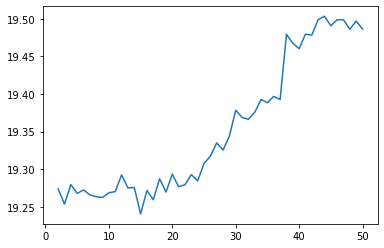

In [1958]:
err=[]
n=list(range(2,51))
for dep in range(2,51):
    from sklearn.tree import DecisionTreeRegressor

    ## fit model k = 10
    k=10
    i=0
    j=int(len(X)/k)
    MAPE = []

    for q in range(1,k+1):
        #subsetting x_train into k partitions
        x_valid = X[i:j]
        y_valid = Y[i:j]

        x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
        y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)

    
        regdt = DecisionTreeRegressor(min_samples_split=dep, max_depth=8,min_samples_leaf = 5)
        regdt.fit(x_tr,y_tr)
        y_pred = regdt.predict(x_valid)
        MAPE.append(np.mean(np.abs((y_valid-y_pred)*100/y_valid)))
        i = j
        j = i + int(len(X)/k)
    err.append(np.mean(MAPE))
plt.plot(n,np.array(err))  

## Hyperparameter Tuning for KNN Model

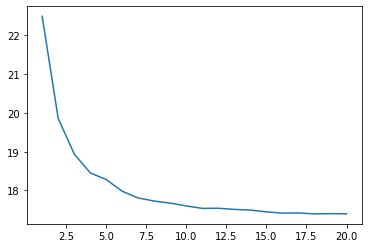

In [1959]:
X= X.apply(lambda X: ((X-np.mean(X))/np.std(X)))
## fit model k = 10
n=list(range(1,21))
err=[]
for z in range(1,21):
    k=10
    i=0
    j=int(len(X)/k)
    RMSE = []
    MAE = []
    MAPE = []

    for q in range(1,k+1):
        #subsetting x_train into k partitions
        x_valid = X[i:j]
        y_valid = Y[i:j]

        x_tr= pd.concat([X[0:i],X[j:len(X)]], axis=0)
        y_tr= pd.concat([Y[0:i],Y[j:len(X)]], axis=0)


        reg_knn = KNeighborsRegressor(n_neighbors=z)
        reg_knn.fit(x_tr,y_tr)
        y_pred_knn = reg_knn.predict(x_valid)
        RMSE.append((np.mean((y_valid - y_pred_knn)**2)**0.5))
        MAE.append(np.mean(np.abs(y_valid-y_pred_knn)))
        MAPE.append(np.mean(np.abs((y_valid-y_pred_knn)*100/y_valid)))
        i = j
        j = i + int(len(X)/k)
    err.append(np.mean(MAPE))
plt.plot(n,np.array(err))

## Model testing on test data

In [1960]:
# Model performance on test data 
#test data
house_p =pd.read_csv("test.csv")
# Ranking Zipcode
house_p=pd.merge(house_p,a,on='zipcode')
house_p=house_p.rename(columns={'price_x':'price'})
house_p=house_p.rename(columns={'price_y':'rank by zip'})
house_p.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rank by zip
0,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,20.0
1,5416510830,20140806T000000,300000.0,4,2.5,1910,4862,2.0,0,0,...,1910,0,2005,0,98038,47.3607,-122.034,2010,5091,20.0
2,1545808560,20150403T000000,245000.0,3,2.5,1530,8500,1.0,0,0,...,1030,500,1996,0,98038,47.3592,-122.046,1850,8140,20.0
3,4123840310,20150106T000000,342500.0,3,2.5,1810,5192,2.0,0,0,...,1810,0,1993,0,98038,47.3724,-122.042,1810,6200,20.0
4,2322069114,20141010T000000,287653.0,3,1.0,1050,16050,1.0,0,0,...,1050,0,1960,1981,98038,47.3841,-122.006,1610,27600,20.0


In [1961]:
xx=house_p.drop(['price','date','id','zipcode','long','lat','yr_renovated'],axis=1)
yy=house_p["price"]


y_pr = regdt.predict(xx)


# Calculating MAPE
MAPE = (np.sum(np.abs(y_pr-yy)*100/yy))/len(yy)

# Calculating RMSE
RMSE_per = ((np.sum(((y_pr-yy)*100/yy)**2))/len(yy))**0.5


print("MAPE: ",MAPE)
print("RMSE: ",RMSE_per)

MAPE:  18.26629990730169
RMSE:  27.29775084116094


## Report : 

1.  We are getting an error(MAPE) of 18.2 on the test data with the best model we have. 